<a href="https://colab.research.google.com/github/devskvotcher/PTLab4/blob/main/lab4_TP_Pandas_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание по библиотекам Pandas и Matplotlib
### Лабораторная работа № 3 по дисциплине "Технологии программирования"

Подключаем необходимые библиотеки:

# Новый раздел

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Скачиваем датасет с информацией о пассажирах Титаника:

In [3]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2023-10-11 07:29:54--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  43.19K  --.-KB/s    in 0.04s   

2023-10-11 07:29:54 (1.16 MB/s) - ‘titanic.csv.1’ saved [44225/44225]



Проверяем наличие скачанного датасета:



In [4]:
!ls

sample_data  titanic.csv  titanic.csv.1


Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

In [5]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


__С использованием датафрейма нужно выполнить следующие задания__.

1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [9]:
# Ваш код
# Проверяем наличие пропущенных значений в каждом столбце
missing_values = df.isnull().any()

# Выводим результат
print(missing_values)


Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                        False
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                       False
dtype: bool


2. В соответствии с вариантом, определите:

   1. Количество женщин старше 50 лет на борту.
   2. Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми.
   3. Число погибших детей в возрасте до 12 лет, путешествующих первым классом.
   4. Среднее значение коэффициента выживаемости десяти пассажиров третьего класса с самыми дорогими билетами.
   5. Среднее значение цены билета пассажиров, путешествующих без родственников.

In [10]:
# Ваш код
# Используя метод query
dead_children_first_class = df.query('Survived == 0 & Age <= 12 & Pclass == 1').shape[0]

# Или используя условные выражения
dead_children_first_class_alternative = df[(df['Survived'] == 0) & (df['Age'] <= 12) & (df['Pclass'] == 1)].shape[0]

# Выводим результат
print(f'Число погибших детей до 12 лет, путешествующих первым классом: {dead_children_first_class}')


Число погибших детей до 12 лет, путешествующих первым классом: 1


3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

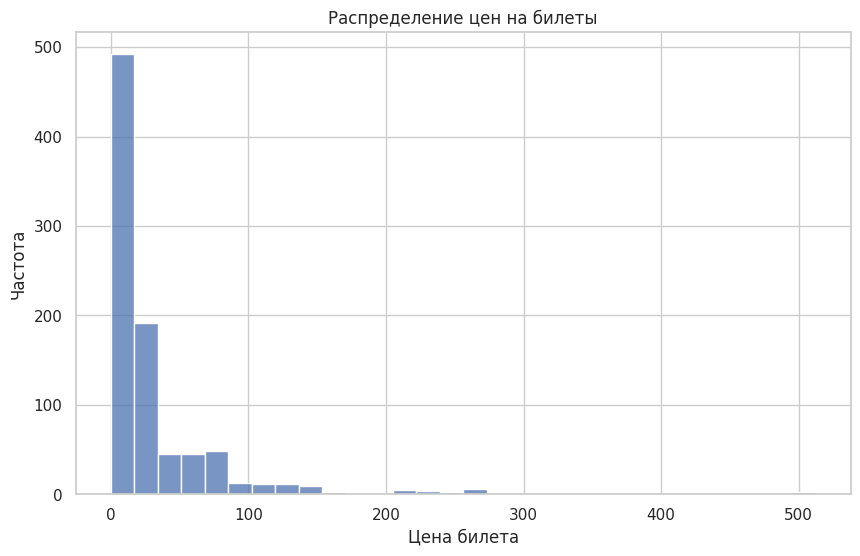

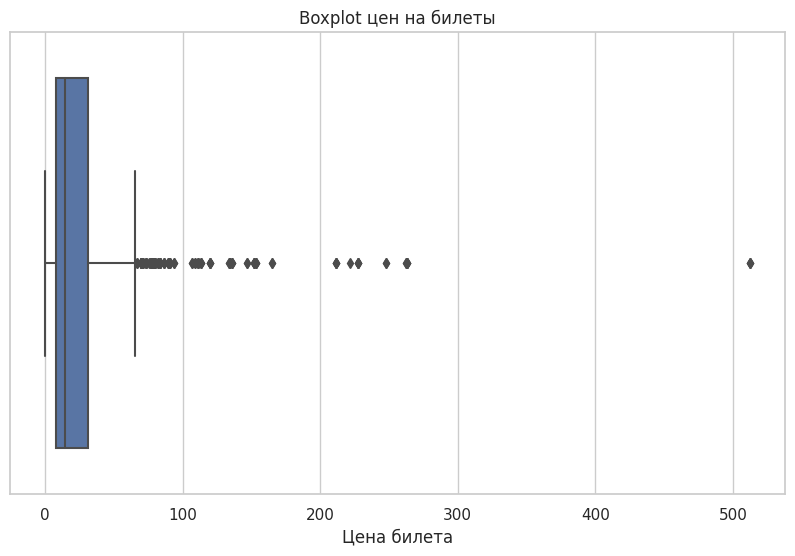

In [13]:
# Ваш код
# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Строим гистограмму
plt.figure(figsize=(10,6))
sns.histplot(df['Fare'], kde=False, bins=30)
plt.title('Распределение цен на билеты')
plt.xlabel('Цена билета')
plt.ylabel('Частота')
plt.show()

# Строим ящик с усами (boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(x='Fare', data=df)
plt.title('Boxplot цен на билеты')
plt.xlabel('Цена билета')
plt.show()

4. В соответствии с вариантом, определите, верны ли следующие утверждения. Приведите доказательства ответа.

  1. Чем дороже билет, тем выше вероятность выжить.
  2. Мужчинам в катастрофе выжить проще.
  3. Чем больше родственников у человека, тем выше шанс того, что он купит билет третьего класса.
  4. Если Вам больше 70 лет, то шансов выжить в катастрофе у Вас практически нет.
  5. Чем больше родственников у чаловека, тем выше его шанс погибнуть.

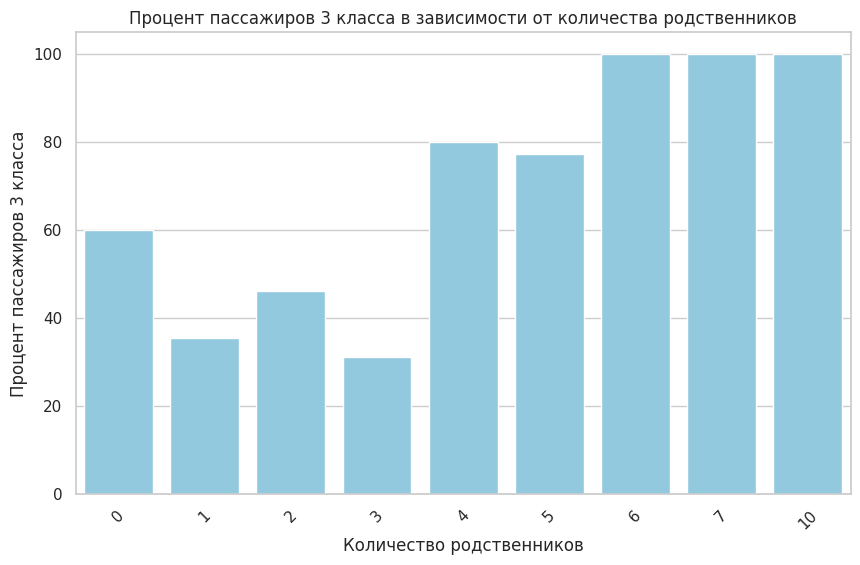

In [14]:
# Ваш код
# Предположим, что ваш датафрейм называется df
# df = pd.read_csv('your_file.csv')

# Создаем новый признак - общее количество родственников на борту
df['Relatives'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']

# Считаем процент пассажиров 3 класса для каждого количества родственников
pclass3_percentage = df[df['Pclass'] == 3].groupby('Relatives')['Pclass'].count() / df.groupby('Relatives')['Pclass'].count() * 100

# Заполняем пропущенные значения (если человек с определенным количеством родственников путешествовал только 3 классом, процент будет NaN)
pclass3_percentage = pclass3_percentage.fillna(0)

# Строим график
plt.figure(figsize=(10,6))
sns.barplot(x=pclass3_percentage.index, y=pclass3_percentage.values, color='skyblue')
plt.title('Процент пассажиров 3 класса в зависимости от количества родственников')
plt.xlabel('Количество родственников')
plt.ylabel('Процент пассажиров 3 класса')
plt.xticks(rotation=45)
plt.show()

5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [15]:
# Ваш код
# Удаляем столбец 'Name'
df = df.drop('Name', axis=1)

# Выводим первые 5 строк датафрейма
print(df.head())

   Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
0         0       3    male  22.0                        1   
1         1       1  female  38.0                        1   
2         1       3  female  26.0                        0   
3         1       1  female  35.0                        1   
4         0       3    male  35.0                        0   

   Parents/Children Aboard     Fare  Relatives  
0                        0   7.2500          1  
1                        0  71.2833          1  
2                        0   7.9250          0  
3                        0  53.1000          1  
4                        0   8.0500          0  


6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [16]:
# Ваш код
# Применяем one-hot encoding к столбцу 'Sex'
df_encoded = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

# Выводим первые 5 строк нового датафрейма
print(df_encoded.head())

   Survived  Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         0       3  22.0                        1                        0   
1         1       1  38.0                        1                        0   
2         1       3  26.0                        0                        0   
3         1       1  35.0                        1                        0   
4         0       3  35.0                        0                        0   

      Fare  Relatives  Sex_female  Sex_male  
0   7.2500          1           0         1  
1  71.2833          1           1         0  
2   7.9250          0           1         0  
3  53.1000          1           1         0  
4   8.0500          0           0         1  


7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

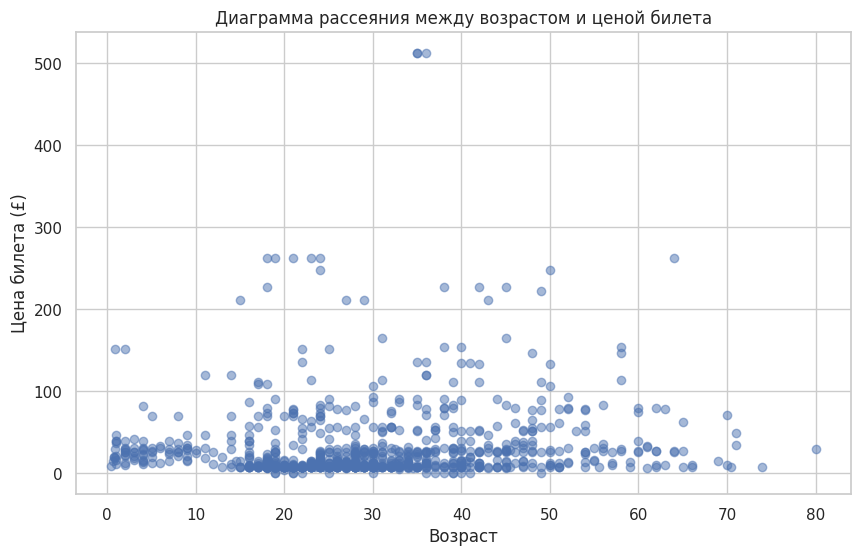

In [18]:
# Ваш код
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Диаграмма рассеяния между возрастом и ценой билета')
plt.xlabel('Возраст')
plt.ylabel('Цена билета (£)')
plt.grid(True)
plt.show()

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [21]:
# Ваш код
# Создаем объект scaler
scaler = MinMaxScaler()

# Обучаем scaler и одновременно трансформируем колонки 'Age' и 'Fare paid in £s'
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Выводим первые 5 строк обновленного датафрейма
print(df.head())

   Survived  Pclass     Sex       Age  Siblings/Spouses Aboard  \
0         0       3    male  0.271174                        1   
1         1       1  female  0.472229                        1   
2         1       3  female  0.321438                        0   
3         1       1  female  0.434531                        1   
4         0       3    male  0.434531                        0   

   Parents/Children Aboard      Fare  Relatives  
0                        0  0.014151          1  
1                        0  0.139136          1  
2                        0  0.015469          0  
3                        0  0.103644          1  
4                        0  0.015713          0  


9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

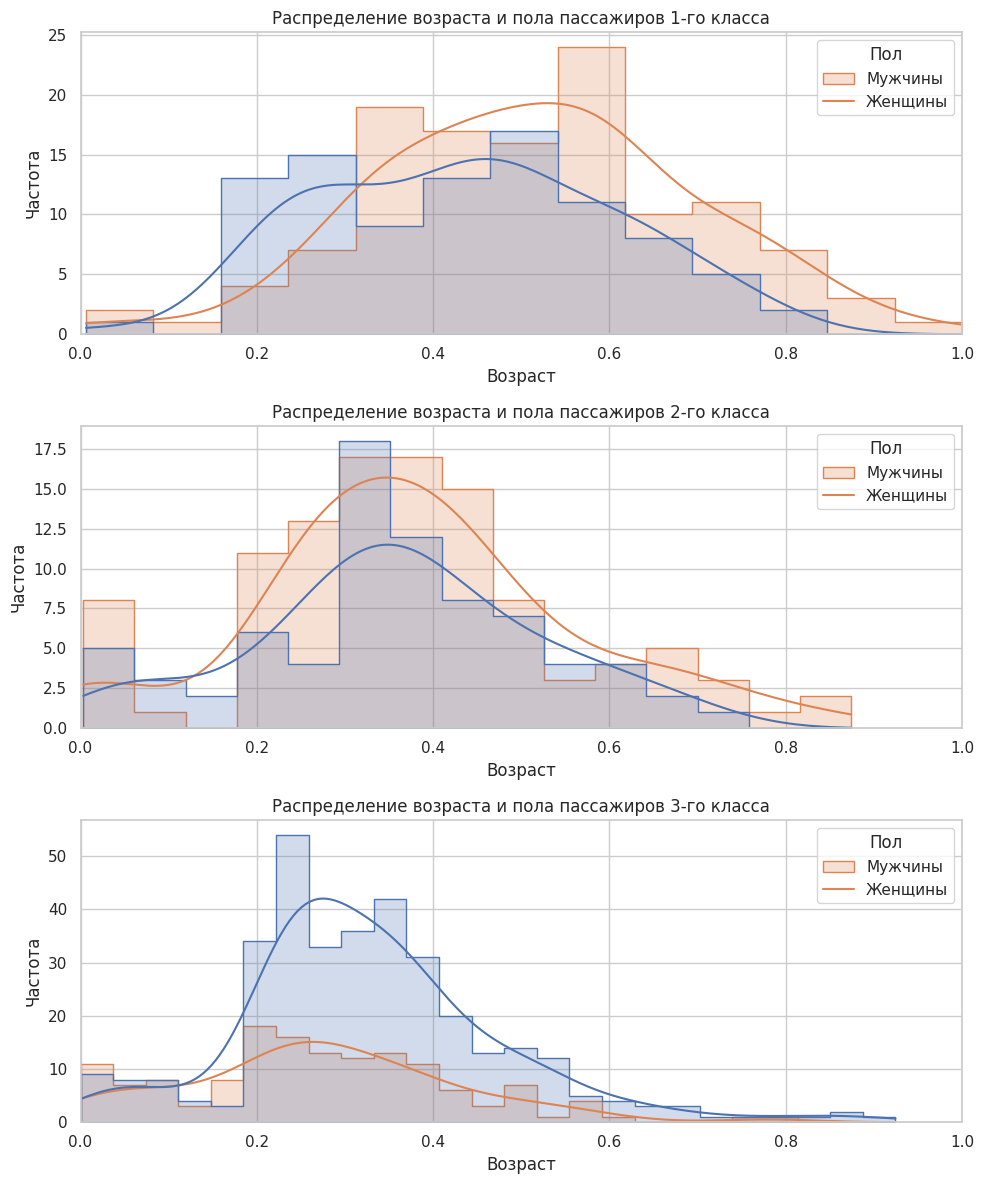

In [24]:
# Ваш код
plt.figure(figsize=(10, 12))

# Для каждого класса создаем подграфик
for i, pclass in enumerate(sorted(df['Pclass'].unique()), start=1):
    plt.subplot(3, 1, i)
    sns.histplot(data=df[df['Pclass'] == pclass], x='Age', hue='Sex', element="step", common_norm=False, kde=True)
    plt.title(f'Распределение возраста и пола пассажиров {pclass}-го класса')
    plt.xlabel('Возраст')
    plt.ylabel('Частота')
    plt.legend(title='Пол', labels=['Мужчины', 'Женщины'])
    plt.xlim(0, df['Age'].max())  # делаем оси абсцисс одинаковыми

plt.tight_layout()
plt.show()

10. Сделайте выводы по работе.